## Exercise 1.23.2

Poisson distribution is generated by setting time interval to be exponential and drawing out sample. Below the threshold time is set to be 1. A random number drawn from exponential series and added to the cumulative time and simultaneously the count is also increased, when the time exceed threshold time it moves to the next time interval. 

The plot below shows the histogram for poisson sample in blue and real poisson distribution in red for lambda = 8

In [1]:
import numpy as np #Numpy library for mathematical operations
import matplotlib.pyplot as plt #Plotting library
from scipy.stats import poisson, gamma

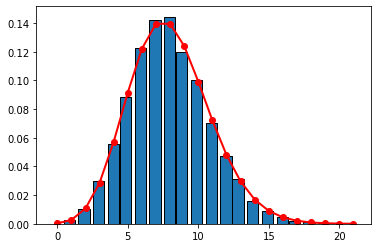

In [2]:
def poisson_samples(lam, n_samples): # Generating poisson samples from time exponential defination
    samples = [] # Store the samples.
    for i in range(n_samples): #Loop through number of times data needs to be generated
        t = 0 #Initialize the time
        count = 0 # Initialize the count
        while True: # loop
            t += np.random.exponential(1/lam) #Add a random number drawn from exponential distribution
            if t > 1: #if time more than 1 which is the threshold then break and move to the next time frame
                break
            count += 1 #increase count if t <1
        samples.append(count) #Append the count to the array
    return samples #return the full sample


lam = 8 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

Poisson Distribution for lambda = 5

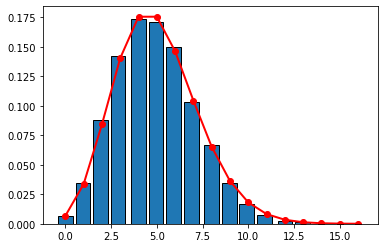

In [3]:
lam = 5 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

Poisson Distribution for lambda = 10

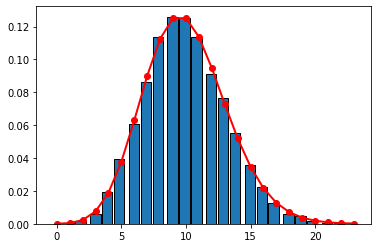

In [4]:
lam = 10 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

## Exercise 4.1

Prosterior function for a Poisson distribution is plotted below with Gamma prior. Lambda =8 and trials =50.

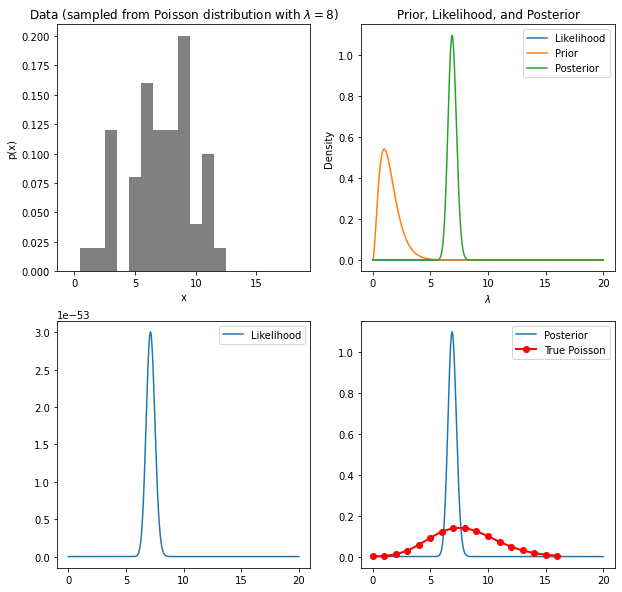

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma

# set the true parameter
lam = 8 #Lambda value

# generate some data from a Poisson distribution
# data = poisson.rvs(lam, size=10) #To check sanity using scipy
data=poisson_samples(lam, 50) # Data generated using exercise 1.23

# define the likelihood function
def likelihood(lam, data):
    return np.prod(poisson.pmf(data, lam)) #Invoking scipy function instead of writing the full poisson function

# define the prior distribution (gamma)
alpha = 3
beta = 2
prior = gamma(alpha, scale=1/beta) #prior function defination as gamma with given alpha and beta

# compute the posterior distribution using Bayes' theorem
lam_vals = np.linspace(0, 20, 700) # lam_vals are the theta
likelihood_vals = [likelihood(lam, data) for lam in lam_vals] #Generating the likelihood_vals
posterior_unscaled = likelihood_vals * prior.pdf(lam_vals) #Prosterior without scaling
posterior = posterior_unscaled / np.trapz(posterior_unscaled, lam_vals) #Normalizing the prosterior making area=1
# plot the results 
# 0,0 graph plots the poisson distributed data generated from exercise 1.23
# 0,1 Lilihood prior and the prosterior functions are plotted together
# 1,0 Only the likelihood is plotted
# 1,1 Prosterior and true poisson functions are plotted.
fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 
axs[0,0].hist(data, bins=np.arange(20)-0.5, density=True, color='gray')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('p(x)')
axs[0,0].set_title('Data (sampled from Poisson distribution with $\lambda=$'+str(lam)+str(")"))
axs[0,1].plot(lam_vals, likelihood_vals, label='Likelihood')
axs[0,1].plot(lam_vals, prior.pdf(lam_vals), label='Prior')
axs[0,1].plot(lam_vals, posterior, label='Posterior')
axs[0,1].set_xlabel('$\lambda$')
axs[0,1].set_ylabel('Density')
axs[0,1].set_title('Prior, Likelihood, and Posterior')
axs[0,1].legend()
axs[1,0].plot(lam_vals, likelihood_vals, label='Likelihood')
axs[1,0].legend()
axs[1,1].plot(lam_vals, posterior, label='Posterior')
axs[1,1].plot(range(max(data)+5), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(data)+5)], 'ro-', linewidth=2,label="True Poisson") #Plotting true Poisson function.
axs[1,1].legend()
plt.savefig("200trials.png",dpi=100)
plt.show()

For 10 trials:

![10 trials](10trials.png "10-Trials Results")

For 100 trials:

![100 trials](100trials.png "100-Trials Results")

For 200 trials :

![200 trials](200trials.png "200-Trials Results")

As the trials were increased the standard deviation of the curve decreased resulting a sharp peak prosteriar at the lambda value. 1000 data points causes numerical underflow for the likelihood but from the above trend it is expected to show even sharper peak.

## Exercise 4.2

Below is the data for predictive poisson distribution with gamma prior. Also the predicted and the theoretical values are plotted in the same plot. Both seems to agree quite well. To solve the integration I used Monte Carlo integration to simplify results.

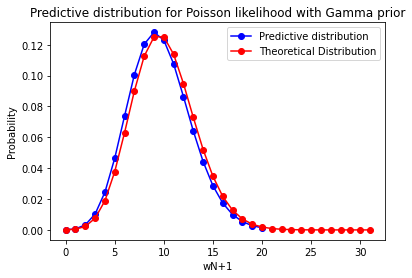

In [50]:
import numpy as np
from scipy.stats import gamma, nbinom, poisson
import matplotlib.pyplot as plt

# Define the true parameter of the Poisson distribution
lam = 10

# Generate observed data from a Poisson distribution
w = poisson_samples(lam,50)

# Define the parameters of the Gamma prior
alpha = 2
beta = 1

# Compute the posterior parameters of the Gamma distribution
alpha_post = sum(w) + alpha
beta_post = len(w) + beta

# One can compute the predictive distribution by Monte Carlo sampling from the posterior distribution
n_samples = 10000 #Total number of draws
lambda_samples = gamma.rvs(alpha_post, scale=1/beta_post, size=n_samples) #generate gamma samples best on alpha' and beta'
w_pred = np.arange(0, 21) # range of possible values for wN+1
p_pred = np.zeros_like(w_pred, dtype=float) #Initilize array to store the predicted values
for i in range(n_samples): # Run through total number of draws
    p_pred += poisson.pmf(w_pred, lambda_samples[i]) #add probability from poisson draw.
p_pred /= n_samples #normalize the cumulative probabilities

# print(p_pred) #print the predictive probability 

# Plot the predictive distribution
plt.plot(w_pred, p_pred, 'bo-', label='Predictive distribution') #The predictive distribution
plt.plot(range(max(w)+15), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(w)+15)],"ro-",label="Theoretical Distribution") # Theoretical Distribution
plt.xlabel('wN+1') #x axis label
plt.ylabel('Probability') #y axis label
plt.title('Predictive distribution for Poisson likelihood with Gamma prior') # Title for the plot
plt.legend() # Display the legend.
plt.show() #Show the plot